# Project 6

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [193]:
df = pd.read_csv('dataset/RRCA_baseflow.csv')
display(df.head())
display(df.shape)
df['Date'] = df['Date'] - 693963# subtract to get date correct.
df['Readable_Date'] = pd.to_datetime(df.Date.astype('int'), unit='D', origin=pd.Timestamp('1900-01-01'))
df['year'] = df.Readable_Date.apply(lambda x:pd.to_datetime(x).year)
df['month'] = df.Readable_Date.apply(lambda x:pd.to_datetime(x).month)
df['day'] = df.Readable_Date.apply(lambda x:pd.to_datetime(x).day)
display(df)
max_date = df['Date'].max()
print(max_date)

# display(df)
# display(f'Unique dates sampled: {len(df.Date.unique()), df.Date.unique().tolist()}')
# display(f'Unique segments sampled: {len(df.Segment_id.unique()), df.Date.unique().tolist()}')
bySegment = df.groupby('Segment_id').count()
# display(bySegment)
# display(bySegment.std().Date)
# display(bySegment.mean().Date)
# TODO: Drop segments with very few (or very many?) samples
# df = df.groupby('Segment_id').filter(lambda x: len(x) >= 75)#gets rid of the segments with less than 75 samples
segmentDateMinMax = df.groupby('Segment_id')['Date'].agg(['min', 'max']).reset_index()
# display(segmentDateMinMax.sort_values(['min', 'max']))
# display(segmentDateMinMax.sort_values(['max', 'min']))

# display(segmentDateMinMax.sort_values('min')['min'].unique())
# display(segmentDateMinMax.sort_values('max')['max'].unique())

segmentObservedMinMax = df.groupby('Segment_id')['Observed'].agg(['min', 'max', 'mean']).reset_index()
display(segmentObservedMinMax.sort_values('max'))
display(segmentObservedMinMax.sort_values('mean'))
outlierSegments = segmentObservedMinMax.sort_values('mean', ascending=False).head(2).Segment_id.tolist()
for outlier in outlierSegments:
    df = df[df.Segment_id != outlier]
df.shape

#Your task is to experiment with linear regression on this dataset. This is a difficult dataset to interpret, and most of your time will be looking at scatterplots, 
#looking at the data over time, looking at positional data, looking at individual segments, and doing background research. Just running regression and looking at the p values 
#for different attributes is most definitely not enough.


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


(15591, 8)

36766


,Segment_id,min,max,mean
14,118,0.068852,0.712258,0.401170
1,51,0.000000,2.373559,0.120455
13,98,0.090000,2.470000,0.804866
3,55,0.070508,4.538689,1.449889
8,63,3.317049,4.931613,4.432331
9,64,0.911639,7.681864,5.507342
4,56,0.000000,8.810492,3.372105
17,135,1.509679,9.469333,5.445460
25,149,0.271967,9.790678,6.092887
10,65,0.120492,11.596102,6.034295


,Segment_id,min,max,mean
1,51,0.000000,2.373559,0.120455
14,118,0.068852,0.712258,0.401170
13,98,0.090000,2.470000,0.804866
21,145,0.000000,13.900000,1.224663
3,55,0.070508,4.538689,1.449889
22,146,0.000000,12.098305,2.212100
36,189,0.000000,23.317167,2.696089
4,56,0.000000,8.810492,3.372105
26,152,0.000000,27.975806,4.035541
8,63,3.317049,4.931613,4.432331


(15353, 12)

<Axes: xlabel='year', ylabel='Observed'>

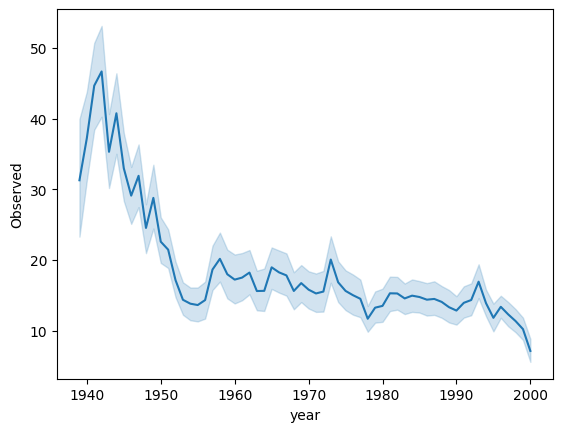

In [194]:
sns.lineplot(data=df, x='year', y='Observed')

<Axes: xlabel='year', ylabel='Observed'>

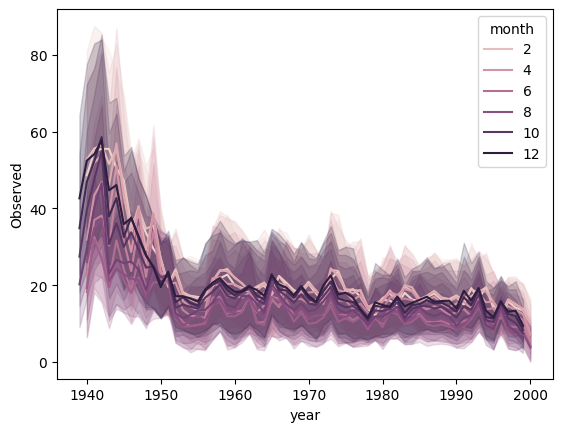

In [195]:
sns.lineplot(data=df, x='year', y='Observed', hue="month")

<Axes: xlabel='month', ylabel='Observed'>

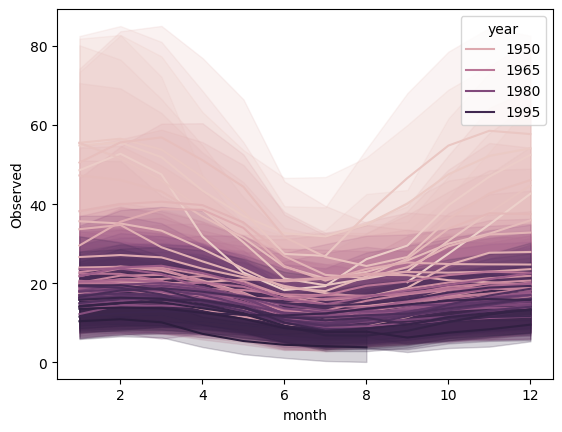

In [196]:
sns.lineplot(data=df, x='month', y='Observed', hue="year")

,year,Observed
0,1939,31.293530
1,1940,37.250385
2,1941,44.673837
3,1942,46.683285
4,1943,35.319446
...,...,...
57,1996,13.397455
58,1997,12.324935
59,1998,11.377356
60,1999,10.239338


<Axes: xlabel='year', ylabel='Observed'>

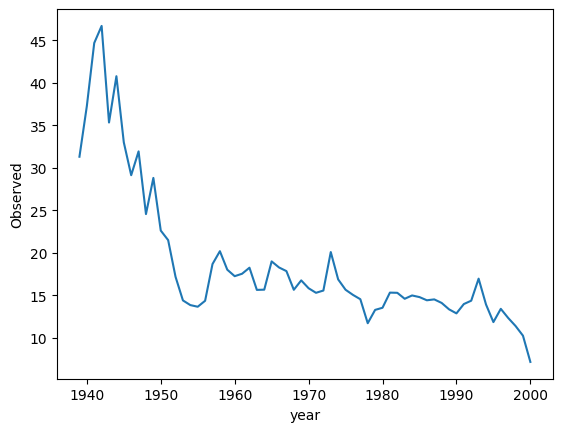

In [197]:
avgObservedPerYear = df.groupby('year')['Observed'].mean().reset_index()
display(avgObservedPerYear)

sns.lineplot(data=avgObservedPerYear, x='year', y='Observed')

,month,Observed
0,1,21.641172
1,2,22.439417
2,3,21.942202
3,4,20.083303
4,5,17.670620
5,6,14.247967
6,7,13.205696
7,8,14.347583
8,9,16.029639
9,10,18.351812


<Axes: xlabel='month', ylabel='Observed'>

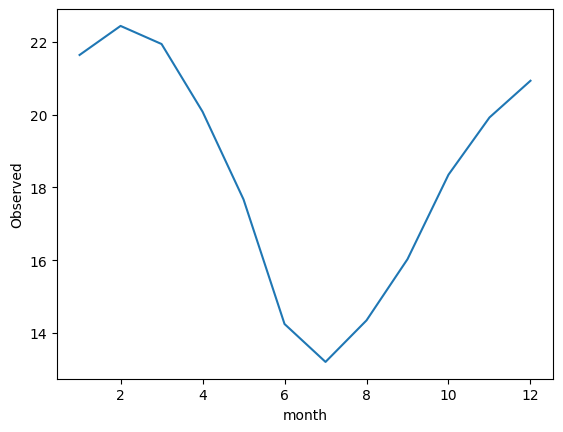

In [198]:
avgObservedPerMonth = df.groupby('month')['Observed'].mean().reset_index()
display(avgObservedPerMonth)

sns.lineplot(data=avgObservedPerMonth, x='month', y='Observed')

,year,month,Observed
0,1939,9,20.256087
1,1939,10,27.445252
2,1939,11,34.853246
3,1939,12,42.619536
4,1940,1,48.580475
...,...,...,...
727,2000,4,7.175279
728,2000,5,5.352061
729,2000,6,4.399778
730,2000,7,4.042711


<Axes: xlabel='month', ylabel='Observed'>

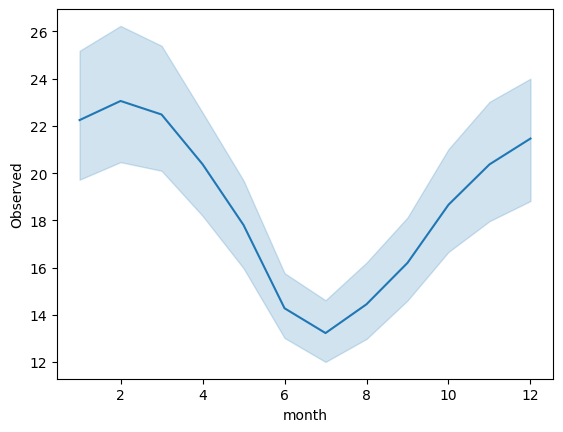

In [199]:
avgObservedByMonth = df.groupby(['year', 'month'])['Observed'].mean().reset_index()
display(avgObservedByMonth)

sns.lineplot(data=avgObservedByMonth, x='month', y='Observed')

,year,month,Observed
0,1939,9,20.256087
1,1939,10,27.445252
2,1939,11,34.853246
3,1939,12,42.619536
4,1940,1,48.580475
...,...,...,...
727,2000,4,7.175279
728,2000,5,5.352061
729,2000,6,4.399778
730,2000,7,4.042711


<Axes: xlabel='month', ylabel='Observed'>

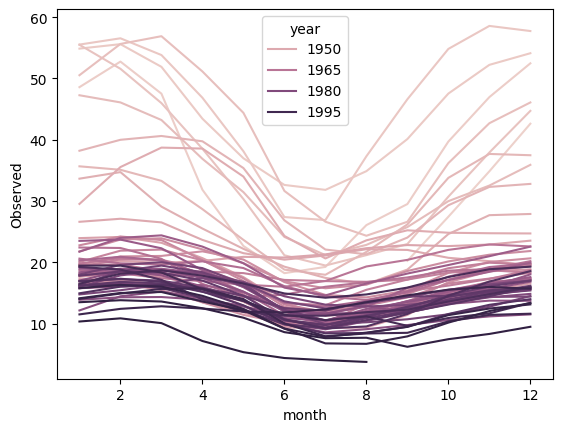

In [200]:
avgObservedByMonth = df.groupby(['year', 'month'])['Observed'].mean().reset_index()
display(avgObservedByMonth)

sns.lineplot(data=avgObservedByMonth, x='month', y='Observed', hue='year')

,year,month,Observed
0,1939,9,20.256087
1,1939,10,27.445252
2,1939,11,34.853246
3,1939,12,42.619536
4,1940,1,48.580475
...,...,...,...
727,2000,4,7.175279
728,2000,5,5.352061
729,2000,6,4.399778
730,2000,7,4.042711


<Axes: xlabel='year', ylabel='Observed'>

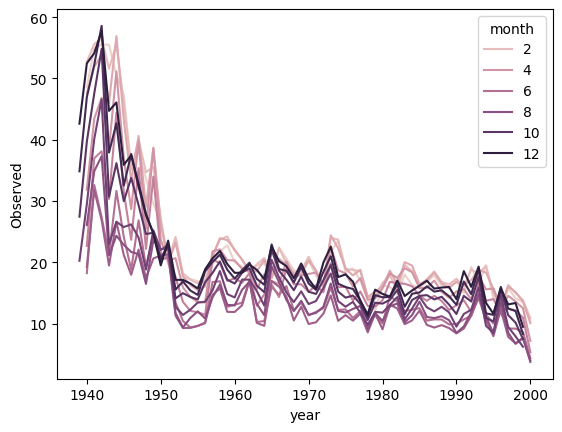

In [201]:
avgObservedByMonth = df.groupby(['year', 'month'])['Observed'].mean().reset_index()
display(avgObservedByMonth)

sns.lineplot(data=avgObservedByMonth, x='year', y='Observed', hue='month')

,year,month,Observed,month_year
0,1939,9,20.256087,477
1,1939,10,27.445252,478
2,1939,11,34.853246,479
3,1939,12,42.619536,480
4,1940,1,48.580475,481
...,...,...,...,...
727,2000,4,7.175279,1204
728,2000,5,5.352061,1205
729,2000,6,4.399778,1206
730,2000,7,4.042711,1207


Text(0.5, 0, 'Months since 1900')

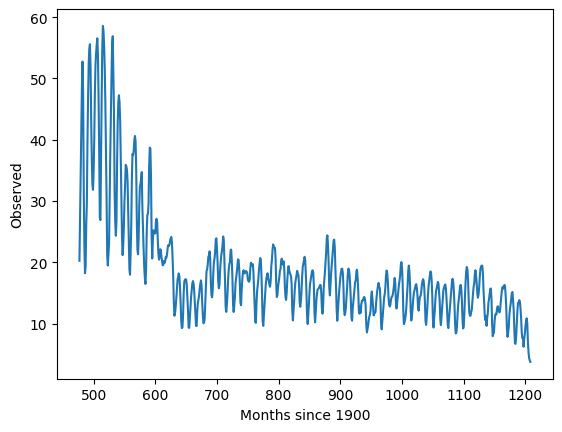

In [202]:
avgObservedByMonth = df.groupby(['year', 'month'])['Observed'].mean().reset_index()
avgObservedByMonth['month_year'] = avgObservedByMonth['month'] + avgObservedByMonth['year'] * 12 - 22800
display(avgObservedByMonth)

sns.lineplot(data=avgObservedByMonth, x='month_year', y='Observed')
plt.xlabel('Months since 1900')

In [203]:
avgObservedByMonth[avgObservedByMonth.year < 1950].sort_values(by="Observed")

,year,month,Observed,month_year
107,1948,8,16.480546,584
106,1948,7,17.467889,583
82,1946,7,17.976549,559
9,1940,6,18.239776,486
81,1946,6,18.818967,558
...,...,...,...,...
53,1944,2,55.629701,530
29,1942,2,56.549796,506
54,1944,3,56.892885,531
39,1942,12,57.734091,516


### Looking at scatterplots data over time, positional data, individual segments, and doing background research.

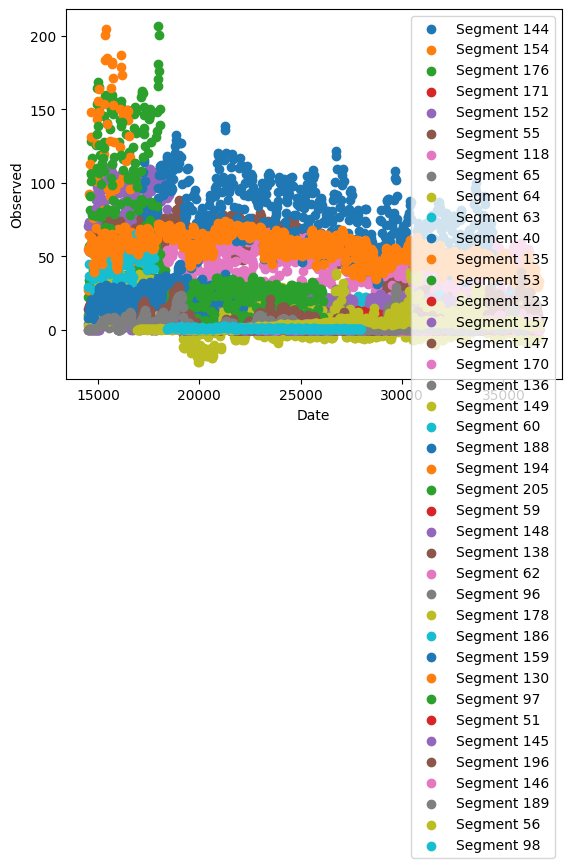

,Date,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Readable_Date,year,month,day
Segment_id,,,,,,,,,,,
96,732,732,732,732,732,732,732,732,732,732,732
130,732,732,732,732,732,732,732,732,732,732,732


In [204]:
#First lets do some scatterplots
for segment_id in df['Segment_id'].unique():
  segment_data = df[df['Segment_id'] == segment_id]
  plt.scatter(segment_data['Date'], segment_data['Observed'], label=f'Segment {segment_id}')
  
plt.xlabel('Date')
plt.ylabel('Observed')
plt.legend(loc='best')  # Change the position of the legend to upper right
plt.show()
# First let's do some scatterplots
top_two_segments = bySegment.nlargest(2, 'Date')
display(top_two_segments)

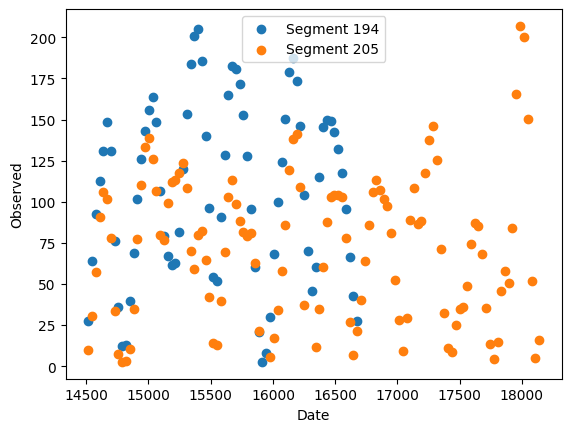

In [205]:
for segment_id in df['Segment_id'].unique():
    segment_data = df[df['Segment_id'] == segment_id]
    if segment_data['Observed'].max() > 200:
        plt.scatter(segment_data['Date'], segment_data['Observed'], label=f'Segment {segment_id}')

plt.xlabel('Date')
plt.ylabel('Observed')
plt.legend(loc='best')  # Change the position of the legend to upper right
plt.show()

In [206]:
# here we see the top three best observed output, its intereting as they only go until 18000 while all the data goes to 35000

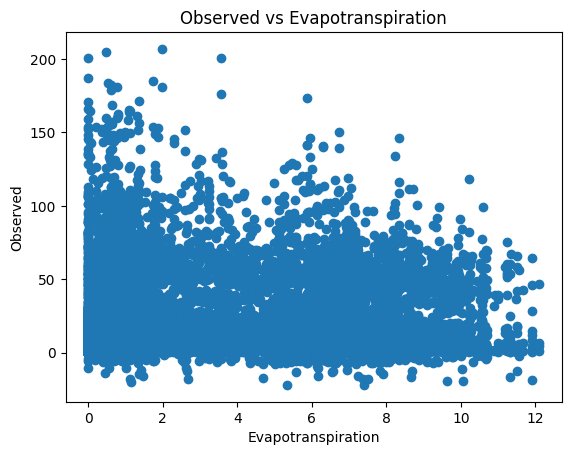

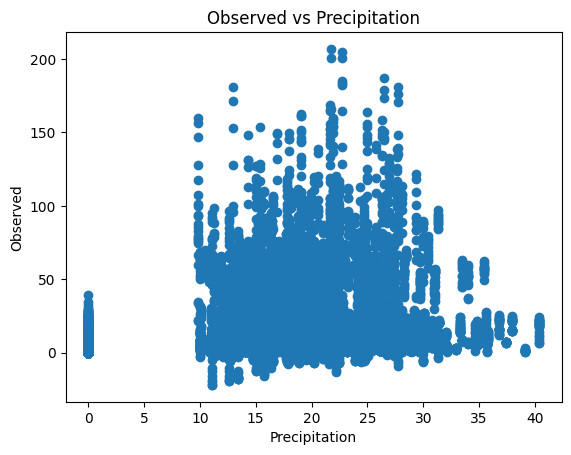

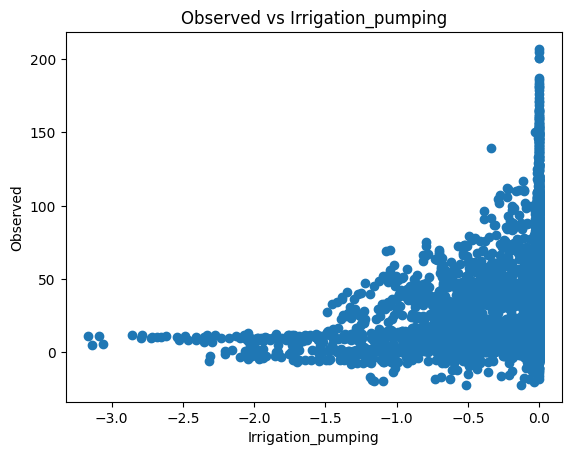

In [207]:
plt.scatter(df['Evapotranspiration'], df['Observed'])
plt.xlabel('Evapotranspiration')
plt.ylabel('Observed')
plt.title('Observed vs Evapotranspiration')
plt.show()

plt.scatter(df['Precipitation'], df['Observed'])
plt.xlabel('Precipitation')
plt.ylabel('Observed')
plt.title('Observed vs Precipitation')
plt.show()

plt.scatter(df['Irrigation_pumping'], df['Observed'])
plt.xlabel('Irrigation_pumping')
plt.ylabel('Observed')
plt.title('Observed vs Irrigation_pumping')
plt.show()




[26.06059083 11.38257487 19.53824284 ... 31.52550558 -8.87311637
  4.7628862 ]
0.3346869875221342


,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping
9045,96,806350,14550720,5.66,20.07,-0.15031
1889,65,838030,14556000,7.97,13.53,-0.48067
7263,59,874990,14556000,0.00,16.77,0.00000
15541,98,721870,14387040,0.00,0.00,0.00000
3996,147,906670,14693280,0.85,21.67,0.00000
...,...,...,...,...,...,...
13371,171,1381870,14460960,0.00,0.00,0.00000
14734,56,1170670,14582400,0.00,0.00,0.00000
8606,96,806350,14550720,1.11,23.00,0.00000
2596,40,1798990,14561280,4.99,26.20,-0.00871


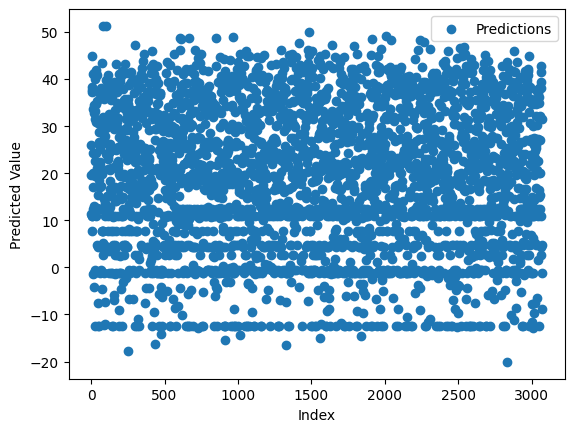

In [208]:
feature_cols = ['Segment_id',	'x',	'y',	'Evapotranspiration',	'Precipitation',	'Irrigation_pumping']
X = df[feature_cols]
y = df["Observed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Segment_id	x	y	Evapotranspiration	Precipitation	Irrigation_pumping	Observed
lm = LinearRegression()
lm.fit(X_train, y_train)


predictions = lm.predict(X_test)
print(predictions)
r_squared = r2_score(y_test, predictions)
print(r_squared)
display(X_test)

plt.scatter(range(len(predictions)), predictions, label='Predictions')
plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()


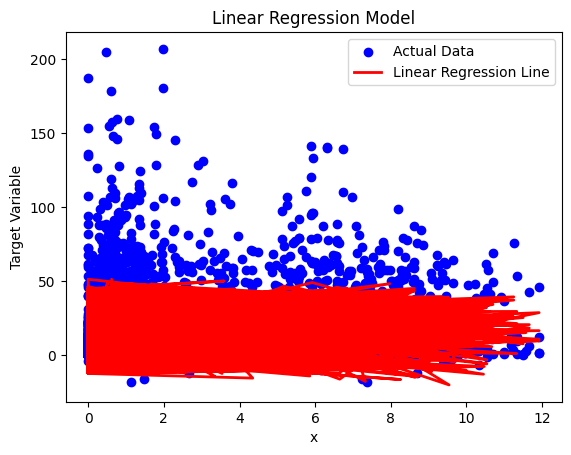

In [209]:
import matplotlib.pyplot as plt

# Plot the actual data points
plt.scatter(X_test["Evapotranspiration"], y_test, color='blue', label='Actual Data')

# Plot the linear regression line
plt.plot(X_test["Evapotranspiration"], predictions, color='red', linewidth=2, label='Linear Regression Line')

# Add labels and title
plt.xlabel('x')
plt.ylabel('Target Variable')
plt.title('Linear Regression Model')

# Add legend
plt.legend()

# Show plot
plt.show()


<Axes: xlabel='Date', ylabel='Observed'>

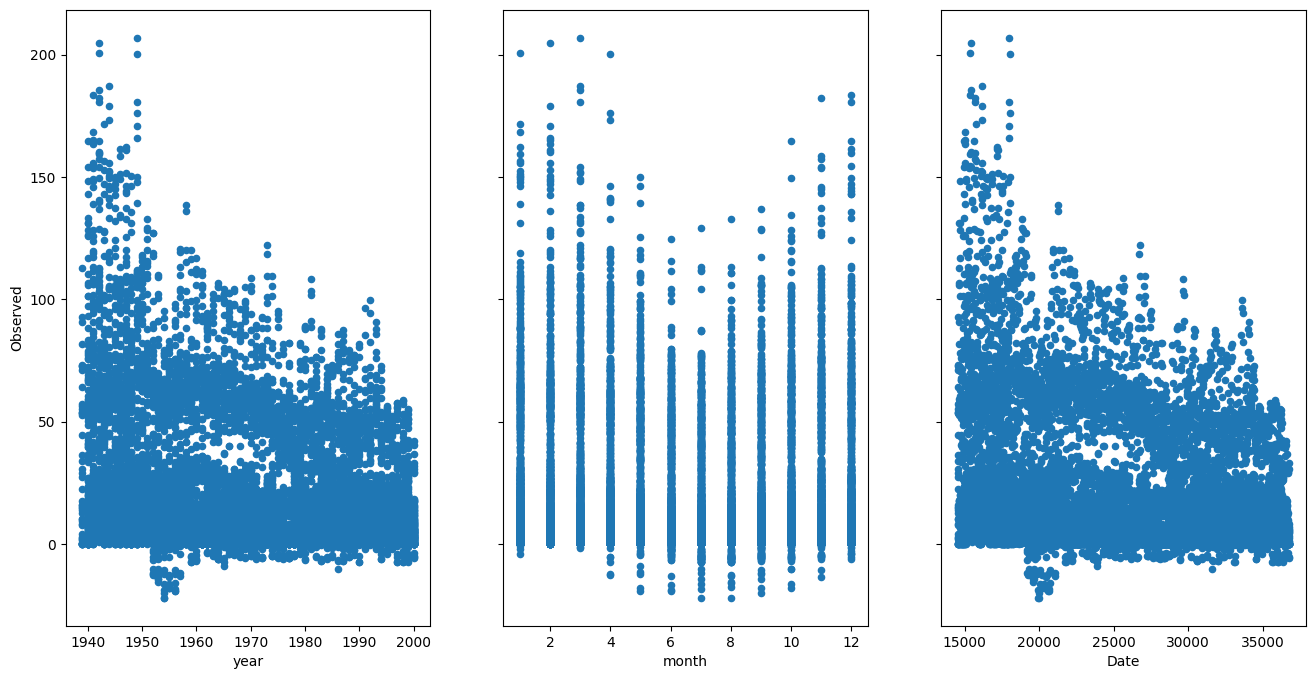

In [210]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='year', y='Observed', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='month', y='Observed', ax=axs[1])
df.plot(kind='scatter', x='Date', y='Observed', ax=axs[2])

<Axes: xlabel='Irrigation_pumping', ylabel='Observed'>

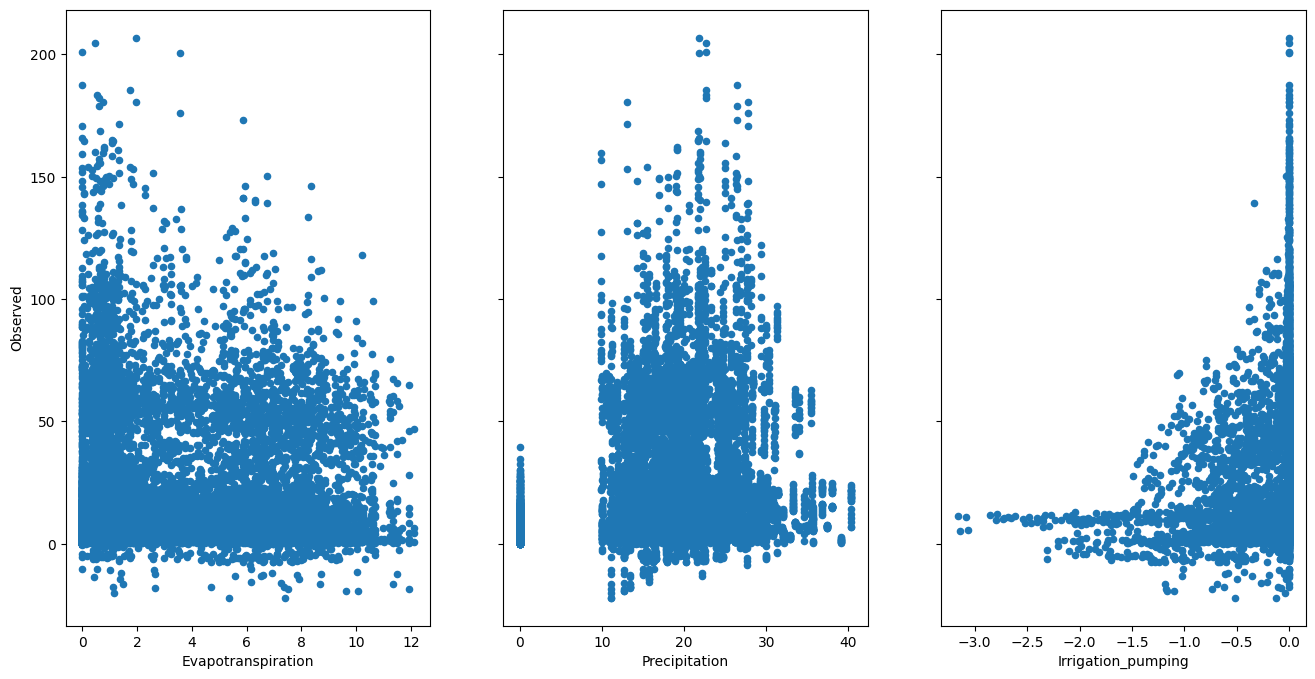

In [211]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='Evapotranspiration', y='Observed', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Precipitation', y='Observed', ax=axs[1])
df.plot(kind='scatter', x='Irrigation_pumping', y='Observed', ax=axs[2])

<Axes: xlabel='y', ylabel='Observed'>

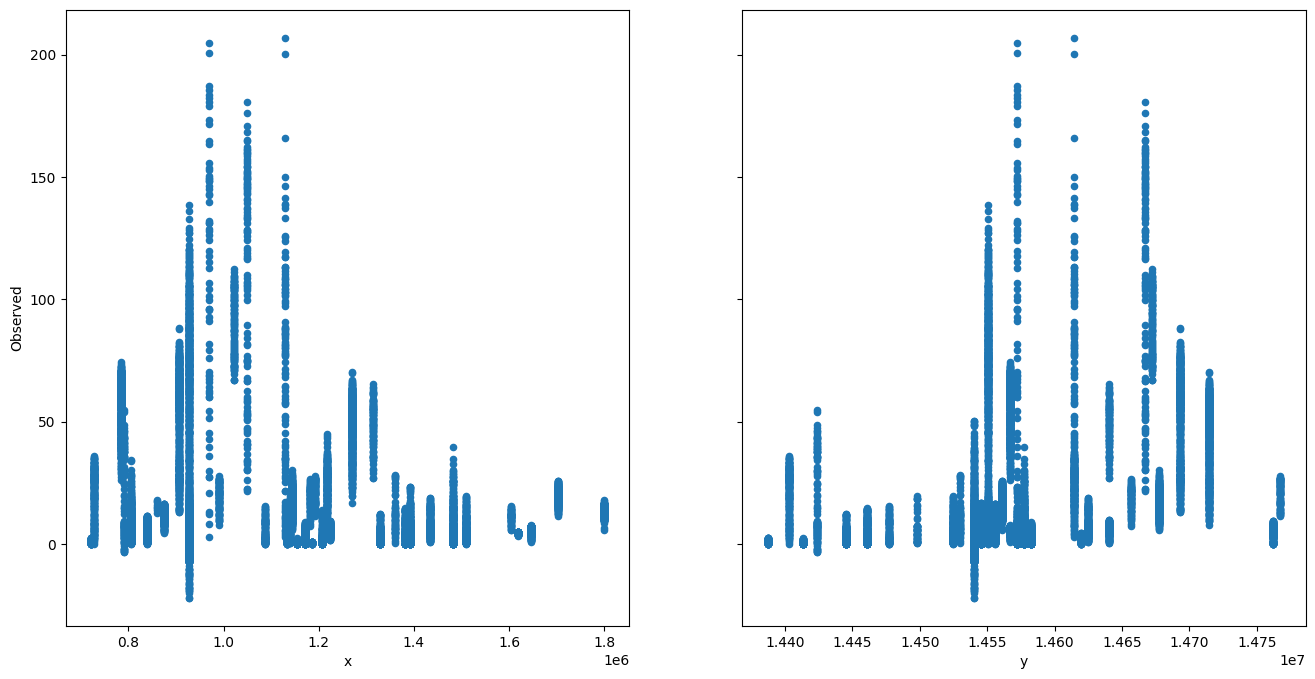

In [212]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=True)
df.plot(kind='scatter', x='x', y='Observed', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='y', y='Observed', ax=axs[1])
# df.plot(kind='scatter', x='Date', y='Observed', ax=axs[2])

<Axes: xlabel='x', ylabel='y'>

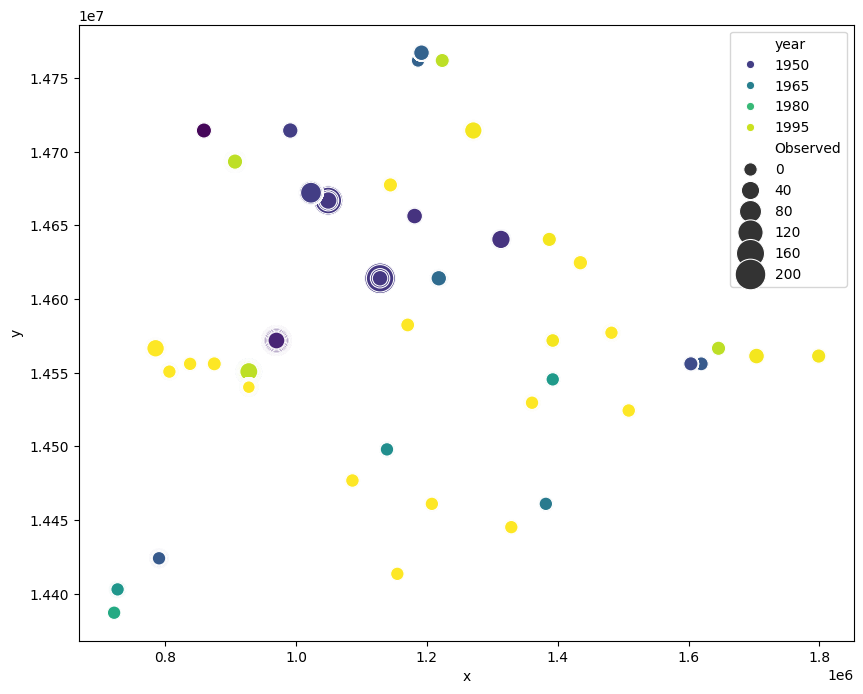

In [213]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='x', y='y', size='Observed', sizes=(50, 500), hue='year', palette='viridis')

<Axes: xlabel='x', ylabel='y'>

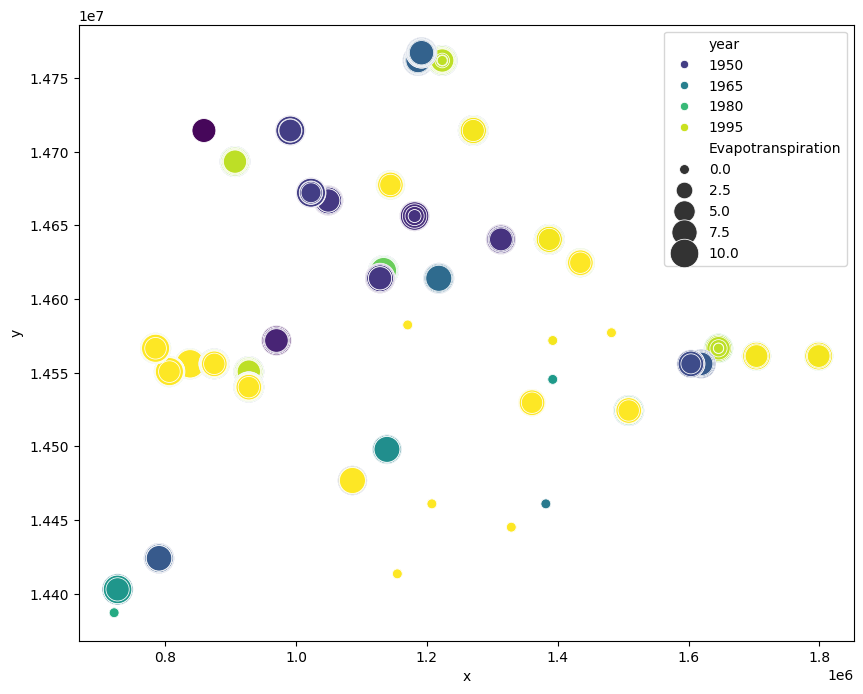

In [214]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='x', y='y', size='Evapotranspiration', sizes=(50, 500), hue='year', palette='viridis')

### Split the data into two groups

In [215]:
decreasingMonthsDF = df[df.month.isin(range(2, 8))]
increasingMonthsDF = df[df.month.isin([1, 8, 9, 10, 11, 12])]
increasingMonthsDF.loc[increasingMonthsDF['month'] == 1, 'month'] = 13
increasingMonthsDF

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Readable_Date,year,month,day
0,16769,144,1086190,14476800,0.59,18.99,0.0,0.145161,1945-11-30,1945,11,30
1,16800,144,1086190,14476800,0.97,29.63,0.0,0.445161,1945-12-31,1945,12,31
2,16828,144,1086190,14476800,1.34,29.63,0.0,1.332203,1946-01-28,1946,13,28
9,17042,144,1086190,14476800,4.24,29.63,0.0,4.831557,1946-08-30,1946,8,30
10,17073,144,1086190,14476800,0.00,29.63,0.0,6.063115,1946-09-30,1946,9,30
...,...,...,...,...,...,...,...,...,...,...,...,...
15580,27665,98,721870,14387040,0.00,0.00,0.0,0.270000,1975-09-30,1975,9,30
15581,27695,98,721870,14387040,0.00,0.00,0.0,0.284754,1975-10-30,1975,10,30
15582,27726,98,721870,14387040,0.00,0.00,0.0,0.300000,1975-11-30,1975,11,30
15583,27757,98,721870,14387040,0.00,0.00,0.0,0.255000,1975-12-31,1975,12,31


<Axes: xlabel='month', ylabel='Observed'>

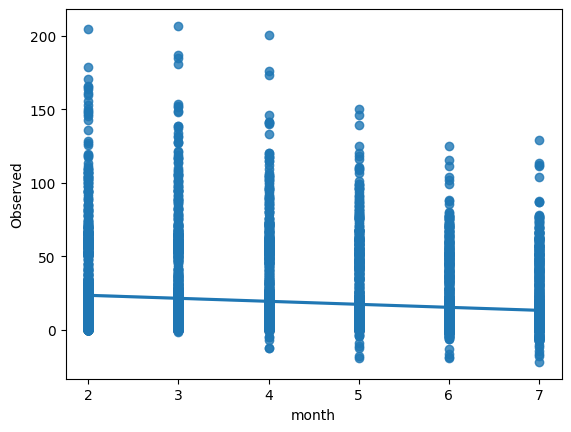

In [254]:
sns.regplot(data=decreasingMonthsDF, x='month', y='Observed')

<Axes: xlabel='month', ylabel='Observed'>

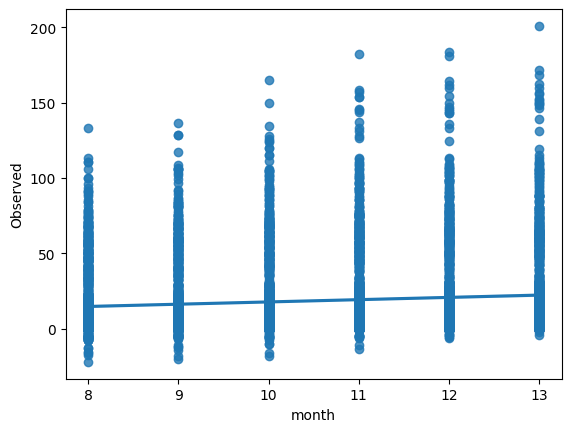

In [217]:
sns.regplot(data=increasingMonthsDF, x='month', y='Observed')

In [218]:
from scipy.stats import pearsonr

# Compute the Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(decreasingMonthsDF['month'], decreasingMonthsDF['Observed'])

print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", p_value)

Pearson correlation coefficient: -0.13637589007814102
p-value: 2.0905426408839098e-33


In [273]:
# create X and y
# feature_cols = ['month', 'Date', 'Evapotranspiration', 'Precipitation', 'x', 'y']
feature_cols = ['month']
X = decreasingMonthsDF[feature_cols]
y = decreasingMonthsDF.Observed

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)
print(lm.score(X, y))

27.486607915057824
[-2.04896912]
0.018598383394605178


In [267]:
feature_cols = feature_cols = ['y', 'x', 'Precipitation']
crossValidations = 20
avgRSquared = 0
for _ in range(crossValidations):
        X = df[feature_cols]
        y = df['Observed']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

        lm = LinearRegression()
        lm.fit(X_train, y_train)

        # print intercept and coefficients
        # print(lm.intercept_)
        # print(lm.coef_)
        # print(lm.score(X_test, y_test))
        avgRSquared += lm.score(X_test, y_test)
avgRSquared /= crossValidations
avgRSquared

0.22797642068426582

In [287]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Observed ~ Precipitation + y + x + month + Date + Irrigation_pumping + Evapotranspiration', data=decreasingMonthsDF).fit()

# print the coefficients
display(lm.params)
display(lm.pvalues)

# print a summary of the fitted model
lm.summary()

Intercept            -1017.598665
Precipitation            0.657538
y                        0.000074
x                       -0.000026
month                   -1.051427
Date                    -0.000595
Irrigation_pumping       6.191706
Evapotranspiration      -0.449691
dtype: float64

Intercept              5.049476e-94
Precipitation          3.099814e-88
y                     5.954447e-104
x                     2.818834e-158
month                  2.973340e-08
Date                   1.381645e-44
Irrigation_pumping     9.119522e-13
Evapotranspiration     6.385512e-05
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     419.0
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:53:49   Log-Likelihood:                -34783.
No. Observations:                7729   AIC:                         6.958e+04
Df Residuals:                    7721   BIC:                         6.964e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1017.5987     48.791    -20.856      0.000   -1113.243    -921.955
Precipitation          0.6575      0.033     20.173      0.000       0.594       0.721
y                   7.404e-05   3.37e-06     21.984      0.000    6.74e-05    8.06e-05
x                  -2.595e-05   9.46e-07    -27.442      0.000   -2.78e-05   -2.41e-05
month                 -1.0514      0.189     -5.549      0.000      -1.423      -0.680
Date                  -0.0006   4.22e-05    -14.099      0.000      -0.001      -0.001
Irrigation_pumping     6.1917      0.865      7.155      0.000       4.495       7.888
Evapotranspiration    -0.4497      0.112     -4.000      0.000      -0.670      -0.229
==============================================================================
Omnibus:                     3149.899   Durbin-Watson:                   0.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18222.874
Skew:                           1.870   Prob(JB):                         0.00
Kurtosis:                       9.527   Cond. No.                     2.88e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [279]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Observed ~ y + x + Precipitation + month', data=df).fit()

# print the coefficients
display(lm.params)
display(lm.pvalues)

# print a summary of the fitted model
lm.summary()

Intercept       -1079.211696
y                   0.000077
x                  -0.000027
Precipitation       0.526973
month              -0.316347
dtype: float64

Intercept        3.633833e-195
y                5.933784e-208
x                 0.000000e+00
Precipitation    6.520473e-155
month             3.095714e-09
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     1143.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:51:04   Log-Likelihood:                -69787.
No. Observations:               15353   AIC:                         1.396e+05
Df Residuals:                   15348   BIC:                         1.396e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1079.2117     35.689    -30.239      0.000   -1149.166   -1009.257
y              7.705e-05   2.47e-06     31.255      0.000    7.22e-05    8.19e-05
x             -2.652e-05   6.56e-07    -40.394      0.000   -2.78e-05   -2.52e-05
Precipitation     0.5270      0.020     26.822      0.000       0.488       0.565
month            -0.3163      0.053     -5.930      0.000      -0.421      -0.212
==============================================================================
Omnibus:                     6562.932   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39033.282
Skew:                           1.976   Prob(JB):                         0.00
Kurtosis:                       9.738   Cond. No.                     2.84e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Observed ~ y + x + Precipitation', data=decreasingMonthsDF).fit()

# print the coefficients
display(lm.params)
display(lm.pvalues)

# print a summary of the fitted model
lm.summary()